In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rprobertakaggle2/__results__.html
/kaggle/input/rprobertakaggle2/__notebook_source__.ipynb
/kaggle/input/rprobertakaggle2/__notebook__.ipynb
/kaggle/input/rprobertakaggle2/__output__.json
/kaggle/input/rprobertakaggle2/RoBERTa_model_weights.h5
/kaggle/input/rprobertakaggle2/custom.css
/kaggle/input/bertmodelweights/BERTmodel_weights.h5
/kaggle/input/redditresampled/rdResampled.csv


In [4]:
import tensorflow as tf
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification, BertTokenizer, TFBertForSequenceClassification

2025-05-18 12:41:31.094299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747572091.295475      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747572091.353885      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
#Load the tokenizer
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [6]:
#Load the model
model_roberta = TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=6)
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

I0000 00:00:1747572119.109787      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch mod

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
#Define the optimizer, loss, and metric
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
Accmetric = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

In [8]:
#Compile the model
model_roberta.compile(optimizer=optimizer, loss=loss, metrics=[Accmetric])
model_bert.compile(optimizer=optimizer, loss=loss, metrics=[Accmetric])

In [9]:
#Load the saved weights
model_roberta.load_weights('/kaggle/input/rprobertakaggle2/RoBERTa_model_weights.h5')
model_bert.load_weights('/kaggle/input/bertmodelweights/BERTmodel_weights.h5')

In [10]:
import emoji

def preprocess_emojis(texts):
    processed_texts = []
    
    for text in texts:
        processed_text = emoji.demojize(text)
        
        processed_text = processed_text.replace(":", "").replace("_", " ")
        
        processed_texts.append(processed_text)
    
    return processed_texts

In [11]:
def predict_classes(texts, threshold):
    label_mapping_reverse = {0: 'depression', 1: 'Anxiety', 2: 'bipolar', 3: 'BPD', 4: 'schizophrenia', 5: 'autism'}
    predicted_classes = []

    processed_texts = preprocess_emojis(texts)  # Call preprocess_emojis function

    for text in processed_texts:
        encoded_input_roberta = tokenizer_roberta.encode_plus(text, truncation=True, padding=True, max_length=256, return_tensors='tf')
        input_ids_roberta = encoded_input_roberta["input_ids"]
        attention_mask_roberta = encoded_input_roberta["attention_mask"]

        encoded_input_bert = tokenizer_bert.encode_plus(text, truncation=True, padding=True, max_length=256, return_tensors='tf')
        input_ids_bert = encoded_input_bert["input_ids"]
        attention_mask_bert = encoded_input_bert["attention_mask"]

        predictions_roberta = model_roberta.predict([input_ids_roberta, attention_mask_roberta])
        predictions_bert = model_bert.predict([input_ids_bert, attention_mask_bert])

        averaged_probs = (predictions_roberta.logits + predictions_bert.logits) / 2.0
        predicted_class_index = tf.argmax(averaged_probs, axis=1).numpy()[0]
        predicted_class_confidence = tf.nn.softmax(averaged_probs, axis=1).numpy()[0][predicted_class_index]
        print(predicted_class_confidence)

        if predicted_class_confidence > threshold:
            predicted_class = label_mapping_reverse[predicted_class_index]
        else:
            predicted_class = 'None'

        predicted_classes.append(predicted_class)

    return predicted_classes


In [12]:
original_text = ["I'm drowning in a sea of sadness... 😔💧 It feels like I'm suffocating and can't escape these \
overwhelming emotions. 😢💔 Every day is a struggle, and it's hard to see any light at the end of the tunnel. \
😞⛈️ My mind is a tornado of negative thoughts, spinning out of control. 🌪️😣 The weight on my chest is unbearable,\
and it's hard to breathe. 😫😭 #depression #mentalhealth"]

predicted_classes1 = predict_classes(original_text,0.60)
print('original text ',predicted_classes1)


1/1 [==============================] - 6s 6s/step
0.86253166
original text  ['depression']


In [13]:
text=[["I got my diagnosis for free because my mom is transphobic.I'm in my 20 and i love how i played my mom. She was pushing for me to get diagnosis because she read somewhere that girls with autism have problems with experiencing gender (Very common terf talking point) and I'm just confused ect. I know it might be a hard thing for some people to wrap the concept of gender but not for me. I already had a little suspicion i was on a spectrum so i agreed and got diagnosed for free because she paid for everything to prove a point. Turned out I'm just autistic AND trans and my doctor even called my mother to tell her to stop acting like a baby and accept me for who i am. Still a win win for me."],
      ["Does anyone else get angry at themself for not being the person they want to be because of their anxiety? As the title of the post suggests, I get angry at myself for not being able to speak up when I should, say things in meetings when I should (for fear of being judged, looking stupid etc). It's like I have a real version of myself in my head that I want to be and I get annoyed at the anxious, insecure version of myself that I feel I am forced to show to the world because of my anxiety. Does anyone else have this feeling? I beat myself up daily for not feeling able to be there person I want to be particularly in a work context as often I feel I can't speak out in meetings in particular or when someone says something I disagree with. On the occasions where I do speak out I fear it comes across as aggression. It's a daily battle I feel I struggle to win."]
     ,["I'm drowning in a sea of sadness... 😔💧 It feels like I'm suffocating and can't escape these \
overwhelming emotions. 😢💔 Every day is a struggle, and it's hard to see any light at the end of the tunnel. \
😞⛈️ My mind is a tornado of negative thoughts, spinning out of control. 🌪️😣 The weight on my chest is unbearable,\
and it's hard to breathe. 😫😭 #depression #mentalhealth"]]

predicted_classes1 = predict_classes(text,0.60)
print('original text ',predicted_classes1)

1/1 [==============================] - 6s 6s/step
0.99984896
1/1 [==============================] - 0s 470ms/step
0.99624157
1/1 [==============================] - 0s 266ms/step
0.828461
original text  ['autism', 'Anxiety', 'depression']


In [13]:
import pandas as pd 
df=pd.read_csv('/kaggle/input/redditresampled/rdResampled.csv')

In [21]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,title_post,Subreddit
0,The end of the road. I've never posted on redd...,depression
1,I can’t write comments. I think I should not c...,depression
2,Attempted hanging myself two years ago. So nea...,depression
3,"25/ f started deliberate self injury. Hi all, ...",depression
4,Venting I guess. I've been crying in my high s...,depression


In [22]:
df.count()

title_post    210000
Subreddit     210000
dtype: int64

In [23]:
X = df['title_post']
y = df['Subreddit']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
import numpy as np
# Combine X_test and y_test into a single dataset
combined_data = np.column_stack((X_test, y_test))

# Split the combined dataset into training and testing sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(combined_data[:, :-1], combined_data[:, -1], test_size=0.2, random_state=42)

In [31]:
print(type(new_X_test))
print(len(new_X_train))
len(new_X_test)

<class 'numpy.ndarray'>
33600


8400

In [35]:
def predictclassesAvg(texts):
    label_mapping_reverse = {0: 'depression', 1: 'Anxiety', 2: 'bipolar', 3: 'BPD', 4: 'schizophrenia', 5: 'autism'}
    predicted_classes = []

    processed_texts = preprocess_emojis(texts)  # Call preprocess_emojis function

    for text in processed_texts:
        encoded_input_roberta = tokenizer_roberta.encode_plus(text, truncation=True, padding=True, max_length=256, return_tensors='tf')
        input_ids_roberta = encoded_input_roberta["input_ids"]
        attention_mask_roberta = encoded_input_roberta["attention_mask"]

        encoded_input_bert = tokenizer_bert.encode_plus(text, truncation=True, padding=True, max_length=256, return_tensors='tf')
        input_ids_bert = encoded_input_bert["input_ids"]
        attention_mask_bert = encoded_input_bert["attention_mask"]

        predictions_roberta = model_roberta.predict([input_ids_roberta, attention_mask_roberta])
        predictions_bert = model_bert.predict([input_ids_bert, attention_mask_bert])

        averaged_probs = (predictions_roberta.logits + predictions_bert.logits) / 2.0
        predicted_class_index = tf.argmax(averaged_probs, axis=1).numpy()[0]
        predicted_class_confidence = tf.nn.softmax(averaged_probs, axis=1).numpy()[0][predicted_class_index]
        print(predicted_class_confidence)
        
        predicted_class = label_mapping_reverse[predicted_class_index]
#         if predicted_class_confidence > threshold:
#             predicted_class = label_mapping_reverse[predicted_class_index]
#         else:
#             predicted_class = 'None'

        predicted_classes.append(predicted_class)

    return predicted_classes


In [ ]:
# #AVG ENSEMBLE MODEL PREDICTIONS - to compare with indiv transformers
# # Perform predictions on the entire test set using the predictclasses function
# predicted_class_names = predictclassesAvg(new_X_test)

 classification report & Confusion Matrix AvgEnsemble

In [ ]:
# # Calculate classification report 
# classification_metrics = classification_report(new_y_test, predicted_class_names)
# print(classification_metrics)

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Obtain confusion matrix WITH None class
# confusion = confusion_matrix(new_y_test, predicted_class_names)

# # Convert confusion matrix to a DataFrame for better visualization
# labels = ['Anxiety', 'BPD', 'autism', 'bipolar','depression', 'schizophrenia']

# confusion_df = pd.DataFrame(confusion, index=labels, columns=labels)

# # Create a heatmap of the confusion matrix
# #plt.figure(figsize=(10, 8))
# sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

In [ ]:
def predictRaBclasses(texts):
    label_mapping_reverse = {0: 'depression', 1: 'Anxiety', 2: 'bipolar', 3: 'BPD', 4: 'schizophrenia', 5: 'autism'}
    predicted_classes_roberta = []
    predicted_classes_bert = []

    processed_texts = preprocess_emojis(texts)  # Call preprocess_emojis function

    for text in processed_texts:
        encoded_input_roberta = tokenizer_roberta.encode_plus(text, truncation=True, padding=True, max_length=256, return_tensors='tf')
        input_ids_roberta = encoded_input_roberta["input_ids"]
        attention_mask_roberta = encoded_input_roberta["attention_mask"]

        encoded_input_bert = tokenizer_bert.encode_plus(text, truncation=True, padding=True, max_length=256, return_tensors='tf')
        input_ids_bert = encoded_input_bert["input_ids"]
        attention_mask_bert = encoded_input_bert["attention_mask"]

        predictions_roberta = model_roberta.predict([input_ids_roberta, attention_mask_roberta])
        predictions_bert = model_bert.predict([input_ids_bert, attention_mask_bert])

        predicted_class_index_roberta = tf.argmax(predictions_roberta.logits, axis=1).numpy()[0]
        predicted_class_roberta = label_mapping_reverse[predicted_class_index_roberta]
        predicted_classes_roberta.append(predicted_class_roberta)

        predicted_class_index_bert = tf.argmax(predictions_bert.logits, axis=1).numpy()[0]
        predicted_class_bert = label_mapping_reverse[predicted_class_index_bert]
        predicted_classes_bert.append(predicted_class_bert)

    return predicted_classes_roberta, predicted_classes_bert


 classification report & Confusion Matrix RoBERTa

In [ ]:
# #getting roberta and bert predictions for the test set - to compare with avg ensemble moodel
# predicted_classes_roberta, predicted_classes_bert = predictRaBclasses(new_X_test)

In [ ]:
# # Calculate classification report 
# classification_metrics = classification_report(new_y_test, predicted_classes_roberta)
# print(classification_metrics)

# # Obtain confusion matrix WITH None class
# confusion = confusion_matrix(new_y_test, predicted_classes_roberta)

# # Convert confusion matrix to a DataFrame for better visualization
# labels = ['Anxiety', 'BPD', 'autism', 'bipolar','depression', 'schizophrenia']

# confusion_df = pd.DataFrame(confusion, index=labels, columns=labels)

# # Create a heatmap of the confusion matrix
# #plt.figure(figsize=(10, 8))
# sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

 classification report & Confusion Matrix BERT

In [ ]:
# # Calculate classification report 
# classification_metrics = classification_report(new_y_test, predicted_classes_bert)
# print(classification_metrics)

# # Obtain confusion matrix WITH None class
# confusion = confusion_matrix(new_y_test, predicted_classes_bert)

# # Convert confusion matrix to a DataFrame for better visualization
# labels = ['Anxiety', 'BPD', 'autism', 'bipolar','depression', 'schizophrenia']

# confusion_df = pd.DataFrame(confusion, index=labels, columns=labels)

# # Create a heatmap of the confusion matrix
# #plt.figure(figsize=(10, 8))
# sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

## ROC Curves

In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Classes
classes = ['depression', 'Anxiety', 'bipolar', 'BPD', 'schizophrenia', 'autism']
n_classes = len(classes)

In [28]:
# Binarize the output
y_test_bin = label_binarize(new_y_test, classes=classes)

In [29]:
# Modified prediction functions to also return probability arrays
def predict_proba_models(texts):
    probs_roberta = []
    probs_bert = []
    probs_avg = []

    processed_texts = preprocess_emojis(texts)

    for text in processed_texts:
        enc_roberta = tokenizer_roberta.encode_plus(text, truncation=True, padding=True, max_length=256, return_tensors='tf')
        enc_bert = tokenizer_bert.encode_plus(text, truncation=True, padding=True, max_length=256, return_tensors='tf')

        logits_roberta = model_roberta.predict([enc_roberta['input_ids'], enc_roberta['attention_mask']]).logits
        logits_bert = model_bert.predict([enc_bert['input_ids'], enc_bert['attention_mask']]).logits

        softmax_roberta = tf.nn.softmax(logits_roberta, axis=1).numpy()[0]
        softmax_bert = tf.nn.softmax(logits_bert, axis=1).numpy()[0]
        softmax_avg = (softmax_roberta + softmax_bert) / 2.0

        probs_roberta.append(softmax_roberta)
        probs_bert.append(softmax_bert)
        probs_avg.append(softmax_avg)

    return np.array(probs_roberta), np.array(probs_bert), np.array(probs_avg)


In [30]:
text=[["I got my diagnosis for free because my mom is transphobic.I'm in my 20 and i love how i played my mom. She was pushing for me to get diagnosis because she read somewhere that girls with autism have problems with experiencing gender (Very common terf talking point) and I'm just confused ect. I know it might be a hard thing for some people to wrap the concept of gender but not for me. I already had a little suspicion i was on a spectrum so i agreed and got diagnosed for free because she paid for everything to prove a point. Turned out I'm just autistic AND trans and my doctor even called my mother to tell her to stop acting like a baby and accept me for who i am. Still a win win for me."],
      ["Does anyone else get angry at themself for not being the person they want to be because of their anxiety? As the title of the post suggests, I get angry at myself for not being able to speak up when I should, say things in meetings when I should (for fear of being judged, looking stupid etc). It's like I have a real version of myself in my head that I want to be and I get annoyed at the anxious, insecure version of myself that I feel I am forced to show to the world because of my anxiety. Does anyone else have this feeling? I beat myself up daily for not feeling able to be there person I want to be particularly in a work context as often I feel I can't speak out in meetings in particular or when someone says something I disagree with. On the occasions where I do speak out I fear it comes across as aggression. It's a daily battle I feel I struggle to win."]
     ,["I'm drowning in a sea of sadness... 😔💧 It feels like I'm suffocating and can't escape these \
overwhelming emotions. 😢💔 Every day is a struggle, and it's hard to see any light at the end of the tunnel. \
😞⛈️ My mind is a tornado of negative thoughts, spinning out of control. 🌪️😣 The weight on my chest is unbearable,\
and it's hard to breathe. 😫😭 #depression #mentalhealth"]]

# Get probabilities
probs_roberta, probs_bert, probs_avg = predict_proba_models(text)
print(probs_roberta, probs_bert, probs_avg)

1/1 [==============================] - 0s 40ms/step
[[5.8450390e-05 3.7134556e-05 2.4582487e-05 5.3432010e-05 1.9560830e-05
  9.9980682e-01]
 [1.2036116e-03 9.9684000e-01 1.0455324e-03 5.8975344e-04 9.6744916e-05
  2.2437242e-04]
 [8.7771082e-01 5.2283751e-03 7.1300924e-02 4.4832651e-02 8.6954248e-04
  5.7620502e-05]] [[1.8188890e-05 1.1048850e-05 2.0323845e-05 4.8283055e-05 3.1981366e-05
  9.9987018e-01]
 [1.3545433e-03 9.9509639e-01 1.3296820e-03 2.0579193e-03 1.2579602e-04
  3.5688499e-05]
 [7.6277697e-01 2.0663472e-02 1.3718863e-01 7.5878546e-02 3.3235583e-03
  1.6878235e-04]] [[3.83196384e-05 2.40917034e-05 2.24531650e-05 5.08575322e-05
  2.57710981e-05 9.99838471e-01]
 [1.27907749e-03 9.95968223e-01 1.18760718e-03 1.32383639e-03
  1.11270470e-04 1.30030458e-04]
 [8.20243895e-01 1.29459240e-02 1.04244776e-01 6.03555962e-02
  2.09655031e-03 1.13201429e-04]]


In [ ]:
# Get probabilities
probs_roberta, probs_bert, probs_avg = predict_proba_models(new_X_test)

1/1 [==============================] - 0s 40ms/step


In [34]:
# Plot ROC curves
def plot_roc_curves(y_true_bin, probs, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curves - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


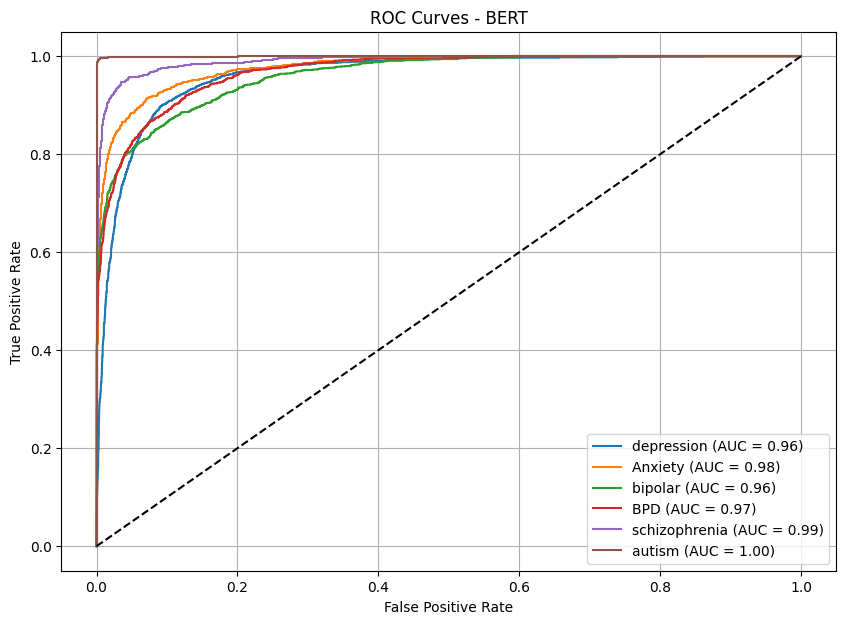

In [35]:
# Plot for each model
plot_roc_curves(y_test_bin, probs_bert, "BERT")

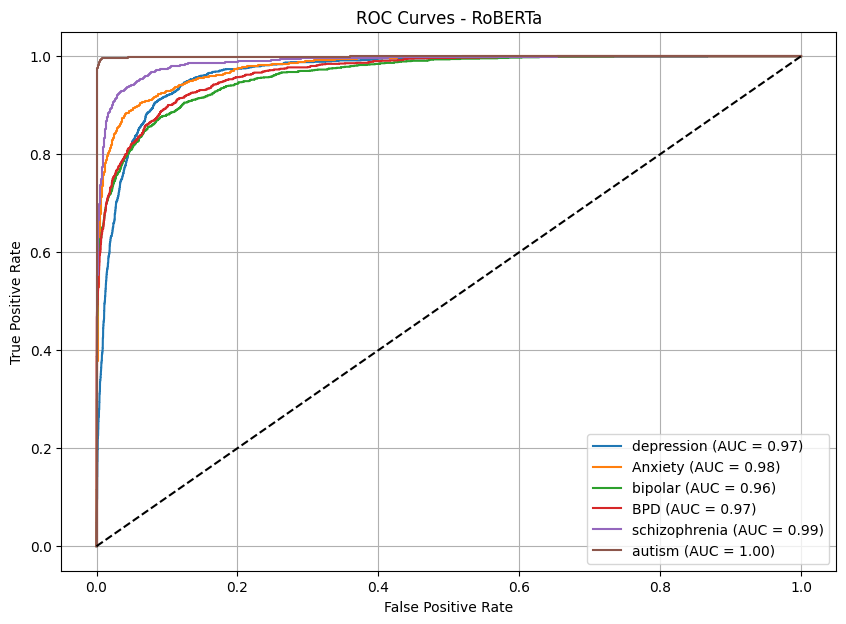

In [36]:
plot_roc_curves(y_test_bin, probs_roberta, "RoBERTa")

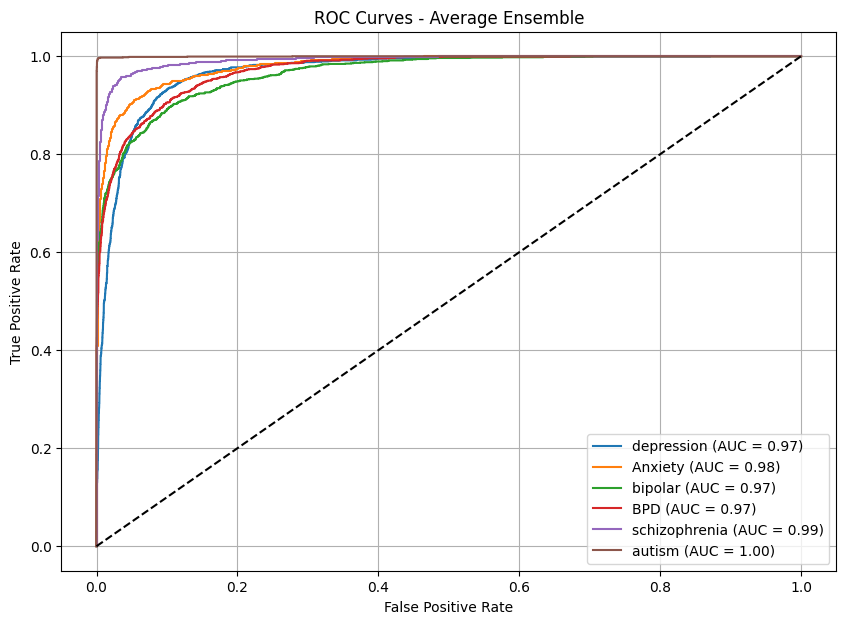

In [37]:
plot_roc_curves(y_test_bin, probs_avg, "Average Ensemble")